# Multiple Linear Regression

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(123)

### Multiple Linear Regression (OLS estimation)
Simulate data for x and y:

In [2]:
nsample = 50
x1 = np.linspace(1, 10, nsample)
x2 = np.sqrt(x1)

In [3]:
x1[:5]

array([1.        , 1.18367347, 1.36734694, 1.55102041, 1.73469388])

In [4]:
x2[:5]

array([1.        , 1.08796759, 1.16933611, 1.2453997 , 1.31707778])

In [5]:
X = np.column_stack((x1, x2))
X[:5]

array([[1.        , 1.        ],
       [1.18367347, 1.08796759],
       [1.36734694, 1.16933611],
       [1.55102041, 1.2453997 ],
       [1.73469388, 1.31707778]])

In [6]:
X = sm.add_constant(X)
X[:5]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.18367347, 1.08796759],
       [1.        , 1.36734694, 1.16933611],
       [1.        , 1.55102041, 1.2453997 ],
       [1.        , 1.73469388, 1.31707778]])

In [7]:
# b0, b1, b2 coefficients
beta = [2, 0.5, 10]

# random error
e = np.random.normal(size=nsample)

# linear equation
y = np.dot(X, beta) + e

In [9]:
sample_df = pd.DataFrame({"y":y, "x1": x1, "x2": x2})
sample_df.head()

,y,x1,x2
0,11.414369,1.000000,1.000000
1,14.468858,1.183673,1.087968
2,14.660013,1.367347,1.169336
3,13.723212,1.551020,1.245400
4,15.459524,1.734694,1.317078


In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(sample_df["y"], sample_df["x1"], sample_df["x2"], )
plt.show()

<Figure size 640x480 with 0 Axes>

In [14]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     950.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           9.87e-39
Time:                        14:18:15   Log-Likelihood:                -79.344
No. Observations:                  50   AIC:                             164.7
Df Residuals:                      47   BIC:                             170.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5097      2.189      1.146      0.2

### OLS for non-linear curve but linear in parameters
Let's try OLS with a non-linear relationship between x and y:

In [15]:
nsample = 20
x1 = np.linspace(1, 20, nsample)
x2 = x1**2
x3 = x1**3

X = np.column_stack((x1, x2, x3))
X = sm.add_constant(X)

beta = [5, 0.5, 0.5, -0.02]
e = np.random.normal(size=nsample)

y = np.dot(X, beta) + e

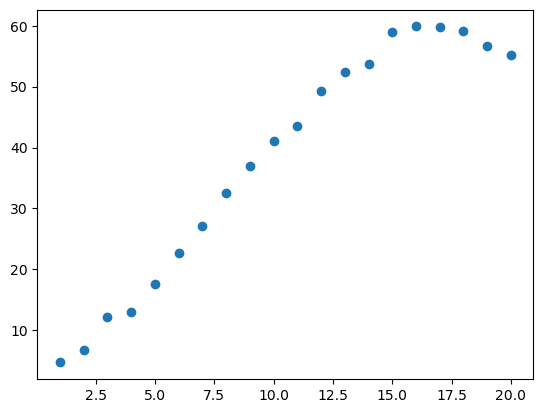

In [16]:
plt.scatter(x1, y)

In [17]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2659.
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           8.59e-22
Time:                        14:18:33   Log-Likelihood:                -25.217
No. Observations:                  20   AIC:                             58.43
Df Residuals:                      16   BIC:                             62.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0308      1.043      2.907      0.0

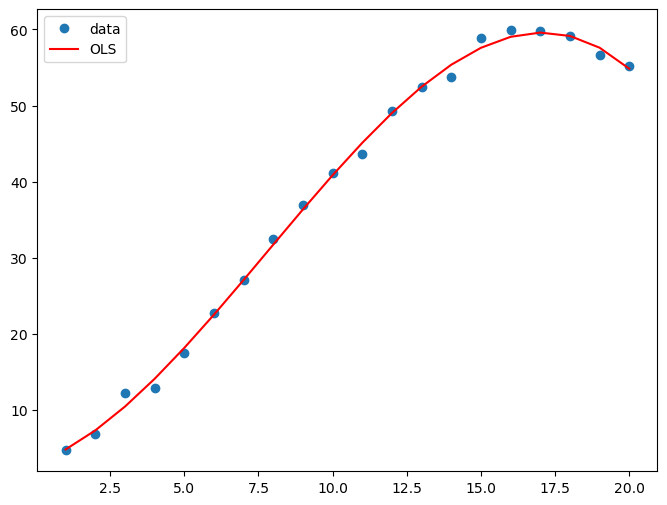

In [18]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x1, y, 'o', label="data")
ax.plot(x1, res.fittedvalues, 'r-', label="OLS")
ax.legend(loc='best');

## Prediction bands

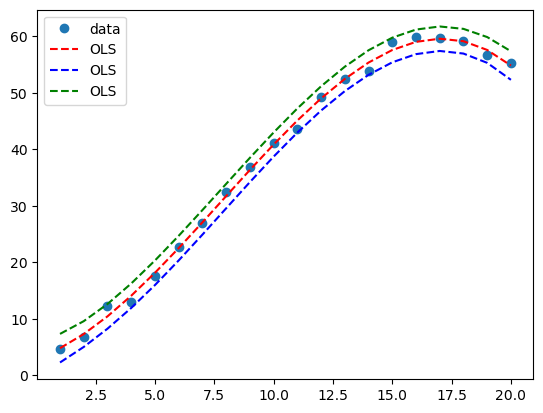

In [22]:
pred_ols = res.get_prediction()

iv_l = pred_ols.summary_frame()['obs_ci_lower']
iv_u = pred_ols.summary_frame()['obs_ci_upper']

fig,ax = plt.subplots()
ax.plot(x1, y, 'o', label="data")
ax.plot(x1, res.fittedvalues, 'r--', label="OLS")
ax.plot(x1, iv_l, 'b--', label="OLS")
ax.plot(x1, iv_u, 'g--', label="OLS")
ax.legend(loc='best');